In [6]:
import tweepy
import keys
import glob, os, json
from datetime import datetime, timedelta
import pandas as pd


In [14]:
client = tweepy.Client(bearer_token=keys.BEARER_TOKEN)

In [8]:
query = 'sakit tenggorokan -RT -is:retweet -is:quote lang:id'

In [17]:
now = datetime.now()
weeksago = now - timedelta(days=7)
dictionary = {}

In [24]:
while weeksago < now:
    print(weeksago)
    endday = weeksago + timedelta(days=1)
    startday = weeksago
    if int(weeksago.strftime("%d")) == int(now.strftime("%d")) - 1:
        endday = weeksago + timedelta(hours=16, minutes=59, seconds=40)
    os.makedirs(os.path.dirname("data/"), exist_ok=True)
    with open("data/tweet_" + weeksago.strftime("%Y-%m-%d") + ".json", "w") as f:
        for tweet in tweepy.Paginator(client.search_recent_tweets,  query=query, end_time=endday, max_results=100, tweet_fields=['created_at'], start_time=startday).flatten(limit=1000):
            f.write(json.dumps(tweet.data) + '\n')
    weeksago = weeksago + timedelta(days=1)

2021-12-30 07:33:15.263903
2021-12-31 07:33:15.263903
2022-01-01 07:33:15.263903
2022-01-02 07:33:15.263903
2022-01-03 07:33:15.263903
2022-01-04 07:33:15.263903
2022-01-05 07:33:15.263903


In [4]:
json_pattern = os.path.join('data', '*.json')
file_list = glob.glob(json_pattern)

In [5]:
dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(file, lines=True) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  2488 non-null   datetime64[ns, UTC]
 1   id          2488 non-null   int64              
 2   text        2488 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 58.4+ KB


In [7]:
df.set_index('created_at').sort_values(by='created_at', ascending=False).head(50)

,id,text
created_at,,
2021-12-30 02:10:32+00:00,1476375118049775616,"ngerti nggak sih rasanya nangis, nahan, sakit ..."
2021-12-30 02:09:04+00:00,1476374748451913728,"@chogiwabois so am i, tenggorokan sakit :(("
2021-12-30 02:06:24+00:00,1476374079225544704,"@eishlynxslove Pag Ciel, eh tapi bener kadang ..."
2021-12-30 02:05:38+00:00,1476373884312043520,"ngerti nggak sih rasanya lagi nangis, nahan su..."
2021-12-30 02:03:05+00:00,1476373242419965952,"Kesalahan bgt ini mah, tidur lupa pake sweater..."
2021-12-30 02:02:30+00:00,1476373095770312704,kemarin tuh gw makan apa ya kok bisa tenggorok...
2021-12-30 02:01:47+00:00,1476372914827972608,@heibabiy Lagi sakit tenggorokan
2021-12-30 02:00:15+00:00,1476372530327801856,@tanyakanrl sakit tenggorokan kek hbs mimi es ...
2021-12-30 01:58:26+00:00,1476372074734112768,"Sumpah ini tenggorokan sakit banget anjrit, ba..."


In [8]:
import nltk
import string
import re

from nltk.tokenize import word_tokenize 

In [9]:
df['lowercase'] = df['text'].str.lower()

In [10]:
df['translate'] = df['lowercase'].str.translate(str.maketrans("","",string.punctuation))

In [11]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    # URLs
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')',
                       re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)


def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(
            token) else token.lower() for token in tokens]
    return tokens

In [12]:
temp = []
for str in df['translate']:
    tokens = preprocess(str)
    temp.append(tokens)

df['tokenize'] = temp

In [13]:
df.head(10)

,created_at,id,text,lowercase,translate,tokenize
0,2021-12-24 09:09:14+00:00,1474306160584839168,Tenggorokan sakit,tenggorokan sakit,tenggorokan sakit,"[tenggorokan, sakit]"
1,2021-12-24 09:08:40+00:00,1474306017919836160,Menjelang malam badan udah mendadak panas lagi...,menjelang malam badan udah mendadak panas lagi...,menjelang malam badan udah mendadak panas lagi...,"[menjelang, malam, badan, udah, mendadak, pana..."
2,2021-12-24 09:05:11+00:00,1474305141067051008,"Hari ini aku dari pagi pusing gitu dikit2, dar...","hari ini aku dari pagi pusing gitu dikit2, dar...",hari ini aku dari pagi pusing gitu dikit2 dari...,"[hari, ini, aku, dari, pagi, pusing, gitu, dik..."
3,2021-12-24 09:00:17+00:00,1474303906364624896,Makan manis terus sampe tenggorokan sakit send...,makan manis terus sampe tenggorokan sakit send...,makan manis terus sampe tenggorokan sakit send...,"[makan, manis, terus, sampe, tenggorokan, saki..."
4,2021-12-24 08:49:33+00:00,1474301205077659648,bangun tdr sakit tenggorokan,bangun tdr sakit tenggorokan,bangun tdr sakit tenggorokan,"[bangun, tdr, sakit, tenggorokan]"
5,2021-12-24 08:38:48+00:00,1474298499969654784,Kebanyakan makan yupi jadi sakit tenggorokan:((,kebanyakan makan yupi jadi sakit tenggorokan:((,kebanyakan makan yupi jadi sakit tenggorokan,"[kebanyakan, makan, yupi, jadi, sakit, tenggor..."
6,2021-12-24 08:33:33+00:00,1474297178159865856,"Ini cuacanya lagi ekstrim bgt, banyak yg sakit...","ini cuacanya lagi ekstrim bgt, banyak yg sakit...",ini cuacanya lagi ekstrim bgt banyak yg sakit ...,"[ini, cuacanya, lagi, ekstrim, bgt, banyak, yg..."
7,2021-12-24 08:26:00+00:00,1474295280321269760,"@boninoona12 Badan lemes, tenggorokan sakit, m...","@boninoona12 badan lemes, tenggorokan sakit, m...",boninoona12 badan lemes tenggorokan sakit mata...,"[boninoona, 12, badan, lemes, tenggorokan, sak..."
8,2021-12-24 08:16:32+00:00,1474292898371817472,"pedes lada gak enak banget dah, tenggorokan sa...","pedes lada gak enak banget dah, tenggorokan sa...",pedes lada gak enak banget dah tenggorokan sak...,"[pedes, lada, gak, enak, banget, dah, tenggoro..."
9,2021-12-24 08:15:36+00:00,1474292662014562304,"Peneliti Inggris mengatakan, sakit tenggorokan...","peneliti inggris mengatakan, sakit tenggorokan...",peneliti inggris mengatakan sakit tenggorokan ...,"[peneliti, inggris, mengatakan, sakit, tenggor..."


In [14]:
dftime = pd.DataFrame({'Timestamp': df['created_at']})

In [15]:
dftime['Date'] = dftime['Timestamp'].apply(lambda x: "%d-%d" % (x.day, x.month))

In [31]:
dftime.groupby(['Date']).size()

Date
23-12    187
24-12    277
25-12    411
26-12    339
27-12    316
28-12    278
29-12    633
30-12     47
dtype: int64

In [17]:
import matplotlib.pyplot as plt

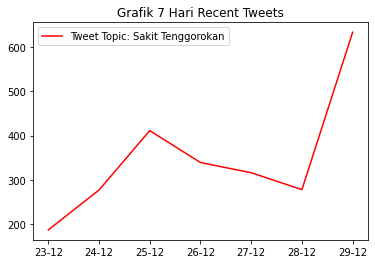

In [18]:
plt.plot(dftime.groupby(['Date']).size().head(7), label='Tweet Topic: Sakit Tenggorokan', color='red')

plt.title('Grafik 7 Hari Recent Tweets')

plt.legend(loc='upper left')

plt.show()

In [41]:
datetime.today().strftime('%Y-%m-%d 00:00')

'2021-12-30 00:00'

In [57]:
dflist = []
todaydate = datetime.today()
strtodaydate = todaydate.strftime('%Y-%m-%d 00:00')
beforedate = todaydate - timedelta(1)
strbeforedate = beforedate.strftime('%Y-%m-%d 00:00')

dflist.append(df['tokenize'].loc[(df['created_at'] >= strbeforedate) & (df['created_at'] < strtodaydate)])

In [58]:
dflist

[1637    [lwtsaga, jan, banyak, 2, makannya, nanti, sak...
 1638    [katanya, blasteran, belandajepang, okay, penj...
 1639    [ainunnajib, minggu, lalu, suami, sakit, tengg...
 1640           [2314, jpg, lagi, sakit, tenggorokan, bil]
 1641    [tenggorokan, perih, bgt, ampe, nelen, air, mi...
                               ...                        
 2483    [tenggorokan, gue, sakit, gatel, gitu, kayakny...
 2484    [icybbuble, kuesioner, berarti, kuantitatif, y...
 2485    [lah, di, tik, tok, juga, banyak, yg, sakit, t...
 2486    [ftrrii, 1, lagian, emang, lagi, cuacanya, jug...
 2487    [iisreds, 82, jaman, cicak, msh, jd, dinosauru...
 Name: tokenize, Length: 633, dtype: object]